
# Generate a studio-quality avatar from a selfie and full-body posture image.

## Setup

Install OpenVTO and configure your API key:


In [1]:
# Install OpenVTO (uncomment if needed)
# !pip install openvto

import os
from dotenv import load_dotenv

# Load the GOOGLE_API_KEY from the .env file
load_dotenv()

True

In [2]:
from openvto import OpenVTO
from pathlib import Path
from IPython.display import Image, display
from PIL import Image
import io

## Initialize Client

Create an OpenVTO client. Use `provider="mock"` for testing without API keys.


In [3]:
vto = OpenVTO(
    provider="google",
    image_model="gemini-3-pro-image-preview",
    cache_enabled=False
)

print(f"Provider: {vto.provider_name}")
print(f"Image model: {vto.image_model}")
print(f"Video model: {vto.video_model}")

Provider: google
Image model: gemini-3-pro-image-preview
Video model: veo-3.1-fast-generate-preview


## Load Input Images

You need two images:
1. **Selfie** — A clear face photo for identity
2. **Posture** — A full-body image showing the desired pose


In [4]:
path_to_assets = Path().parent / "assets"

# Create test images (replace with your own paths)
selfie_image = Image.open(path_to_assets / "selfie.jpg")
posture_image = Image.open(path_to_assets / "posture.jpg")

print("✓ Test images created")
print("  (Replace with real image paths for actual use)")

✓ Test images created
  (Replace with real image paths for actual use)


In [ ]:
selfie_image

In [ ]:
posture_image

## Generate Avatar

Call `generate_avatar()` with your images. Options:
- `background`: "studio" (default), "white", "gradient"
- `seed`: For reproducible results
- `prompt`: Override the default prompt


In [ ]:
# Generate the avatar
result = vto.generate_avatar(
    selfie=selfie_image,
    posture=posture_image,
    keep_clothes=False
)

print("✓ Avatar generated!")
print(f"  Size: {result.avatar.width}x{result.avatar.height}")
print(f"  Background: {result.avatar.background.value}")

## View Results

Display the generated avatar:


In [ ]:
bytes_data = result.image  # bytes of a PNG/JPG/etc.
img = Image.open(io.BytesIO(bytes_data))
display(img)

## Generation Metadata

Examine details about the generation:


In [ ]:
meta = result.meta

print("Generation Metadata:")
print(f"  Model: {meta.model}")
print(f"  Provider: {meta.provider}")
print(f"  Seed: {meta.seed}")
print(f"  Latency: {meta.latency_ms:.0f}ms")
print(f"  Cache hit: {meta.cache_hit}")
if meta.cache_key:
    print(f"  Cache key: {meta.cache_key[:32]}...")

## Save Output

Save the generated avatar to disk:

In [ ]:
output_path = Path("output/avatar_output.png")
output_path.write_bytes(result.image)
print(f"✓ Saved to: {output_path.absolute()}")

---

# Part 2: Virtual Try-On

Apply clothing to the generated avatar.


## Load Clothing Images

Load product images of clothing items you want to try on:


In [ ]:
# Load avatar image
path_to_output = Path().parent / "output"

avatar_image = Image.open(path_to_output / "avatar_output.png")
display(avatar_image)


In [ ]:
# Load clothing items from assets folder
clothing_path = path_to_assets / "brands" / "zara"

# You can load individual items or multiple pieces
jacket_image = Image.open(clothing_path / "jacket_front.jpg")
pants_image = Image.open(clothing_path / "pants_front.jpg")

print("✓ Clothing images loaded")
display(jacket_image)

In [ ]:
display(pants_image)

## Generate Try-On

Apply the clothing to the avatar. You can pass:
- A single clothing image
- Multiple items (they'll be composited automatically)
- An `Outfit` object with detailed item info

In [ ]:
# Generate try-on with the avatar and clothing
tryon_result = vto.generate_tryon(
    avatar=avatar_image,        # Use the avatar we generated earlier
    clothes=[jacket_image, pants_image], # List of clothing images
)

print("✓ Try-on generated!")
print(f"  Latency: {tryon_result.meta.latency_ms/1000:.2f}s")

In [ ]:
# View the clothing composite used for generation
if tryon_result.clothing_composite:
    composite_img = Image.open(io.BytesIO(tryon_result.clothing_composite))
    display(composite_img)

## View Try-On Result

Display the generated try-on image:

In [ ]:
# Display the try-on result
tryon_img = Image.open(io.BytesIO(tryon_result.image))
display(tryon_img)

## Compare: Avatar vs Try-On

Side-by-side comparison:

In [ ]:
# Create side-by-side comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

axes[0].imshow(avatar_image)
axes[0].set_title("Avatar (Base)", fontsize=14)
axes[0].axis("off")

axes[1].imshow(tryon_img)
axes[1].set_title("Try-On Result", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()

## Save Try-On Output

In [6]:
# Save try-on result
tryon_output_path = Path("output/tryon_output.png")
tryon_output_path.write_bytes(tryon_result.image)
print(f"✓ Saved to: {tryon_output_path.absolute()}")

NameError: name 'tryon_result' is not defined

---

# Part 3: Video Loop Generation

Generate an animated video loop from the try-on result. This creates a short clip perfect for social media or product showcases.

## Video Loop Modes

OpenVTO supports different video loop styles:
- **`turn_360`** — Subtle rotation to show the outfit from multiple angles
- **`idle`** — Gentle breathing/movement for a lifelike effect

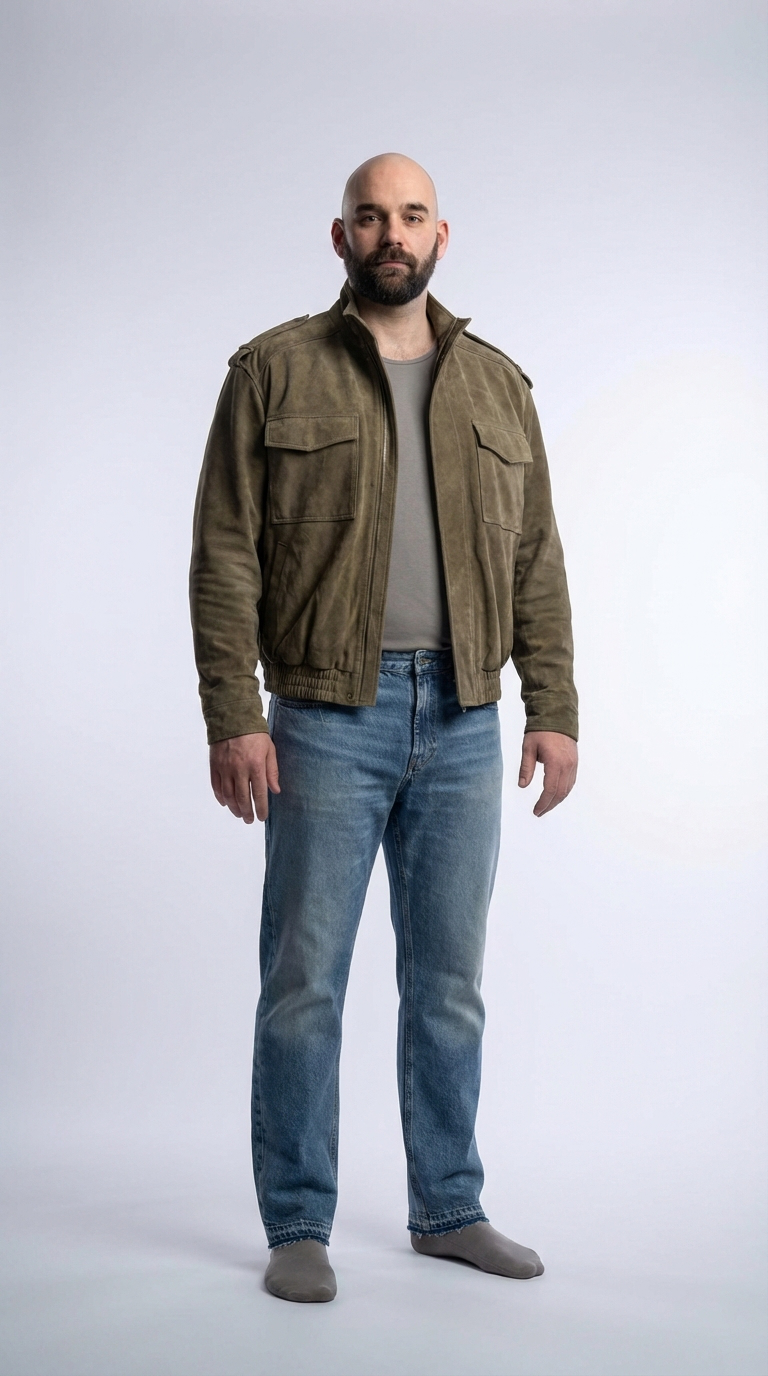

In [7]:
tryon_image = Image.open(tryon_output_path)
display(tryon_image)

In [8]:
# Generate a video loop from the try-on image
video_result = vto.generate_videoloop(
    static_image=tryon_image,          # Use the try-on result
    mode="turn_360",                   # or "idle"
    seconds=4,                         # Video duration (4-6 seconds recommended)
)

print("✓ Video generated!")
print(f"  Duration: {video_result.duration_seconds}s")
print(f"  Size: {video_result.width}x{video_result.height}")
print(f"  Mode: {video_result.mode.value}")
print(f"  Latency: {video_result.meta.latency_ms:.0f}ms")

Type mismatch in _GenerateVideosParameters.image: expected Image, got Part


PipelineError: Video generation failed: Google API error: 400 INVALID_ARGUMENT. {'error': {'code': 400, 'message': 'Input instance with `image` should contain both `bytesBase64Encoded` and `mimeType` in underlying struct value.', 'status': 'INVALID_ARGUMENT'}}

## Save Video Output

In [ ]:
# Save the video to disk
video_output_path = Path("output/tryon_video.mp4")
video_output_path.write_bytes(video_result.video)
print(f"✓ Video saved to: {video_output_path.absolute()}")

# Also save the first frame for reference
first_frame_path = Path("output/video_first_frame.png")
first_frame_path.write_bytes(video_result.first_frame)
print(f"✓ First frame saved to: {first_frame_path.absolute()}")

## Preview Video Frames

View the first and last frames to check loop quality:

In [ ]:
# Compare first and last frames (important for seamless looping)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

first_frame = Image.open(io.BytesIO(video_result.first_frame))
last_frame = Image.open(io.BytesIO(video_result.last_frame))

axes[0].imshow(first_frame)
axes[0].set_title("First Frame", fontsize=14)
axes[0].axis("off")

axes[1].imshow(last_frame)
axes[1].set_title("Last Frame", fontsize=14)
axes[1].axis("off")

plt.suptitle("Loop Quality Check — First vs Last Frame", fontsize=16)
plt.tight_layout()
plt.show()

## Play Video in Notebook

Display the video directly in the notebook (requires HTML5 video support):

In [ ]:
from IPython.display import HTML
import base64

# Encode video for inline display
video_b64 = base64.b64encode(video_result.video).decode('utf-8')

HTML(f'''
<video width="360" height="640" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
  Your browser does not support the video tag.
</video>
''')